# WeatherPy
----


In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st
import os


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
################### NOTE #########################
#####code provided by professor in this block
##################################################

# List for holding lat_lngs and cities values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

################### END BLOCK ####################
##################################################

614

In [3]:
#putting the cities from the api into a dataframe

city_df = pd.DataFrame({'City' : cities})
city_df

,City
0,port shepstone
1,basco
2,hermanus
3,thinadhoo
4,grevena
...,...
609,tsienyane
610,strezhevoy
611,batagay
612,straumen


### API Calls

In [4]:
# API key
from api_keys import weather_api_key

#url
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

In [5]:
#dataframe lists
city_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []



#record and set number initilization
record_num = 1
set_num = 1


print('Beginning Data Retrieval')
print('-----------------------------')


for city in cities:
   
    #parameters
    params ={'location': 'en', 
             'units' : 'imperial',
             'q' : city,
             'APPID': weather_api_key}
      
    #try statement to test for each city --> appending city values if found
    try:
        
        # run a request using our params dictionary
        response = requests.get(base_url, params=params)
        data = response.json()     
        
        #appending city values ti
        lng_list.append(data['coord']['lon'])
        lat_list.append(data['coord']['lat'])
        temp_list.append(data['main']['temp'])
        humidity_list.append(data['main']['humidity'])
        cloud_list.append(data['clouds']['all'])
        wind_list.append(data['wind']['speed'])
        city_name_list.append(data['name'])
        date_list.append(data['dt']) 
        country_list.append(data['sys']['country']) 
        
        print(f'Processing Record {record_num} of Set {set_num} | {city}')  
    
    except KeyError:
        print("City not found. Skipping..")
    
    # Setting Api call limt to 50 per set
    if record_num == 50:
            set_num += 1
            record_num = 1
    
    record_num += 1
        
print('End of Data Retrieval')
print('-----------------------------')
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port shepstone
Processing Record 2 of Set 1 | basco
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | thinadhoo
Processing Record 5 of Set 1 | grevena
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | almonte
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | bugalagrande
Processing Record 10 of Set 1 | maniitsoq
Processing Record 11 of Set 1 | juegang
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | hami
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | yzeure
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | abbeville
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | bilma
Processing Record 23 of Set 1 | faanu

Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | steamboat springs
Processing Record 11 of Set 5 | prainha
Processing Record 12 of Set 5 | kant
Processing Record 13 of Set 5 | port said
Processing Record 14 of Set 5 | souillac
City not found. Skipping..
Processing Record 16 of Set 5 | port antonio
Processing Record 17 of Set 5 | oranjemund
Processing Record 18 of Set 5 | kodiak
Processing Record 19 of Set 5 | saskylakh
Processing Record 20 of Set 5 | lorengau
Processing Record 21 of Set 5 | broome
Processing Record 22 of Set 5 | avera
Processing Record 23 of Set 5 | barranca
Processing Record 24 of Set 5 | hohhot
Processing Record 25 of Set 5 | cidreira
Processing Record 26 of Set 5 | sjovegan
Processing Record 27 of Set 5 | saint george
Processing Record 28 of Set 5 | vardo
Processing Record 29 of Set 5 | dikson
Processing Record 30 of Set 5 | chernigovka
Processing Record 31 of Set 5 | mitchell
Processing Record 32 of Set 5 | marakkanam
Processing Record 33 of S

City not found. Skipping..
Processing Record 18 of Set 9 | cauquenes
Processing Record 19 of Set 9 | tabas
Processing Record 20 of Set 9 | urusha
City not found. Skipping..
Processing Record 22 of Set 9 | naantali
Processing Record 23 of Set 9 | caernarfon
Processing Record 24 of Set 9 | camacha
Processing Record 25 of Set 9 | caramay
Processing Record 26 of Set 9 | bud
Processing Record 27 of Set 9 | heihe
Processing Record 28 of Set 9 | bogorodskoye
Processing Record 29 of Set 9 | dera bugti
Processing Record 30 of Set 9 | barrhead
Processing Record 31 of Set 9 | sao raimundo nonato
Processing Record 32 of Set 9 | holeby
Processing Record 33 of Set 9 | taguatinga
City not found. Skipping..
Processing Record 35 of Set 9 | nabire
Processing Record 36 of Set 9 | zharkent
Processing Record 37 of Set 9 | polovinnoye
Processing Record 38 of Set 9 | indramayu
Processing Record 39 of Set 9 | manjo
Processing Record 40 of Set 9 | prince albert
Processing Record 41 of Set 9 | kingman
Processin

Processing Record 23 of Set 13 | strezhevoy
Processing Record 24 of Set 13 | batagay
Processing Record 25 of Set 13 | straumen
Processing Record 26 of Set 13 | marale
End of Data Retrieval
-----------------------------


### Convert Raw Data to DataFrame


In [6]:
# set up additional columns to hold information
weather_df = pd.DataFrame({'City' : city_name_list,
                           'Lat' : lat_list,
                           'Lng' : lng_list,
                           'Max Temp' : temp_list,
                           'Humidity' : humidity_list,
                           'Cloudiness' : cloud_list,
                           'Wind Speed' : wind_list,
                           'Country' : country_list,
                           'Date' : date_list})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Shepstone,-30.74,30.45,69.76,83,99,11.14,ZA,1603846471
1,Basco,20.45,121.97,81.68,83,100,23.09,PH,1603846471
2,Hermanus,-34.42,19.23,60.01,92,100,1.01,ZA,1603846471
3,Thinadhoo,0.53,72.93,83.73,67,41,11.56,MV,1603846471
4,Grevená,40.08,21.43,46.56,81,100,4.70,GR,1603846471
...,...,...,...,...,...,...,...,...,...
557,Tooele,40.53,-112.30,41.36,48,1,3.36,US,1603846576
558,Strezhevoy,60.73,77.59,10.40,85,20,6.71,RU,1603846576
559,Batagay,67.63,134.63,5.65,93,90,1.90,RU,1603846577
560,Straumen,63.87,11.30,37.94,93,0,8.05,NO,1603846577


## Exporting to CSV File

In [7]:
# Output File (CSV)
weather_df.to_csv("output_data/weatherpy/cities.csv", index=False, encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
     Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#checking dataframe count
weather_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [9]:
#checking to see if any "Humidity" rows are greater than 100 
print([weather_df['Humidity'] > 100])

[0      False
1      False
2      False
3      False
4      False
       ...  
557    False
558    False
559    False
560    False
561    False
Name: Humidity, Length: 562, dtype: bool]


--> step skipped since no cities over 100% humidity

In [10]:
#statics table
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.319075,13.413149,57.056352,75.008897,54.051601,7.486228,1.603846e+09
std,32.888850,92.865562,21.624531,19.308037,41.806479,5.685240,9.119397e+01
min,-54.800000,-175.200000,-11.560000,1.000000,0.000000,0.110000,1.603846e+09
25%,-6.302500,-69.325000,41.790000,66.000000,1.000000,3.365000,1.603846e+09
50%,26.735000,15.880000,62.395000,80.000000,75.000000,5.820000,1.603847e+09
75%,46.552500,96.160000,74.925000,89.000000,97.000000,10.000000,1.603847e+09
max,78.220000,179.320000,90.840000,100.000000,100.000000,54.270000,1.603847e+09


## Plotting the Data


## Latitude vs. Temperature Plot

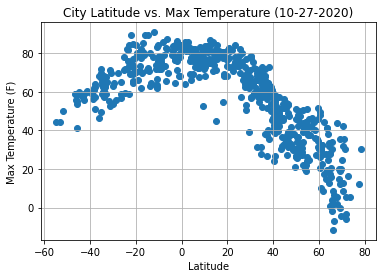

This plot shows that the further you move away from the equator (Lat:0) the colder it gets


In [11]:
#Scatterplot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#exporting plot as png
plt.savefig("output_data/weatherpy/ fig 1 - Latitude_V_Temperature.png")

#printing
plt.show()
print('This plot shows that the further you move away from the equator (Lat:0) the colder it gets')

# Using a function to plot remaining plots

In [12]:
#using a function to plot scatter plots

def plotting_data(x_axis, y_axis, x_lab, y_lab, title, savename):
    
    #scatterplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.grid(True)

    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #sizing
    plt.tight_layout
    
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    plt.show()  
    

## Latitude vs. Humidity Plot

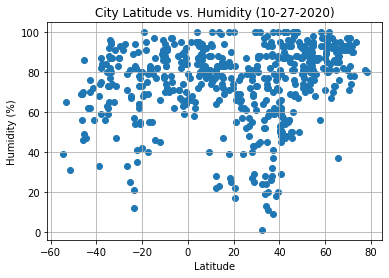

This plot does not show a relationship pattern between latitude and humidity


In [13]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity (%)'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 2 - Latitude_V_Humidity'

#function
plotting_data(weather_df['Lat'], weather_df['Humidity'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and humidity')

## Latitude vs. Cloudiness Plot

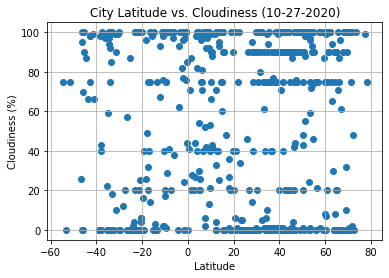

This plot does not show a relationship pattern between latitude and cloudiness


In [14]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness (%)'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 3 - Latitude_V_Cloudiness'

#function
plotting_data(weather_df['Lat'], weather_df['Cloudiness'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and cloudiness')

## Latitude vs. Wind Speed Plot

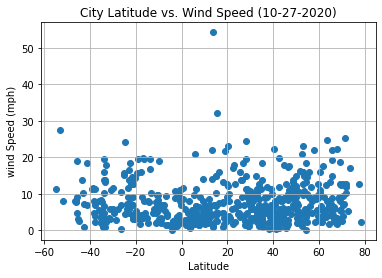

This plot does not show a relationship pattern between latitude and cloudiness


In [15]:
#labeling
x_lab = 'Latitude'
y_lab = 'wind Speed (mph)'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 4 - Latitude_V_Wind_speed'

#function
plotting_data(weather_df['Lat'], weather_df['Wind Speed'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and cloudiness')

## Linear Regression

In [16]:
#finding Northern and southern cities based on Latitude
northern_cities = weather_df.loc[weather_df['Lat'] > 0.00]
southern_cities = weather_df.loc[weather_df['Lat'] < 0.00]

#resetting their indexes
northern_cities.reset_index(inplace = True)
southern_cities.reset_index(inplace = True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: -0.880191617138102


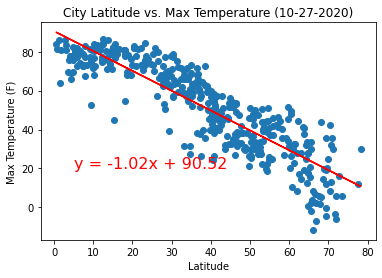

Linear Regression = Negative Correlation
As you move away from the Equator (Lat:0), the Temperature drops in the northern hemisphere cities.


In [17]:
#Scatterplot
plt.scatter(northern_cities['Lat'], northern_cities['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#linear Regression
(slope, intercept, rvalue, pvalue, std_err) = linregress(northern_cities['Lat'], northern_cities['Max Temp'])

#line formula --> y=mx+b
reg_val = northern_cities['Lat'] * slope + intercept
lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'

#line plotting
plt.plot(northern_cities['Lat'], reg_val, color='r')
plt.annotate(lineeq, (5,20), color='red', fontsize=16)

#exporting plot as png
plt.savefig("output_data/weatherpy/fig 5 - LinearREG-Lat_V_Temp - North.png")

#printing
print(f'The r-Value is: {rvalue}')
plt.show()

#conclusions
print('Linear Regression = Negative Correlation')
print('As you move away from the Equator (Lat:0), the Temperature drops in the northern hemisphere cities.')

# Using a function to plot remaining plots

In [18]:
#using a function to plot scatter plots with linear regression

def line_reg_plotting(x_axis, y_axis, x_lab, y_lab, title, savename,linepos):
    
    #linear Regression
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_axis, y_axis)
    
    #line formula --> y=mx+b
    reg_val = x_axis * slope + intercept
    lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    #scatterplot and lineplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.plot(x_axis, reg_val, color='r')
    plt.annotate(lineeq, linepos, color='red',fontsize = 16)
    
    
    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    print(f'The r-Value is: {rvalue}')
    plt.show()  
    


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: 0.7371860270173846


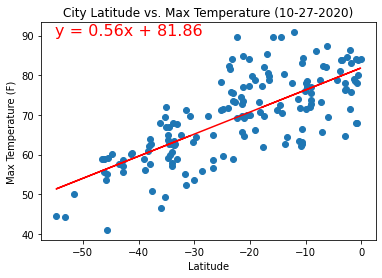

Linear Regression = Positive Correlation
As you move towards the Equator (Lat:0), the temperature rises in the southern hemisphere cities.


In [19]:
#labeling
x_lab = 'Latitude'
y_lab = 'Max Temperature (F)'
title = f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 6 - LinearREG-Lat_V_Temp - South.png'

#line equation position
linepos = (-55,90)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Max Temp'], x_lab, y_lab, title, savename,linepos)  

#conclusions
print('Linear Regression = Positive Correlation')
print('As you move towards the Equator (Lat:0), the temperature rises in the southern hemisphere cities.')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.20296456485434294


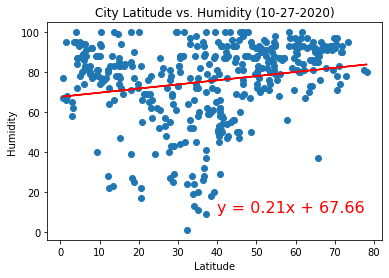

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [20]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 7 - LinearREG-Lat_V_Humid - North.png'

#line equation position
linepos = (40,10)

#labeling #saving #line equation position #function
line_reg_plotting(northern_cities['Lat'], northern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  
    
#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.2690275801098612


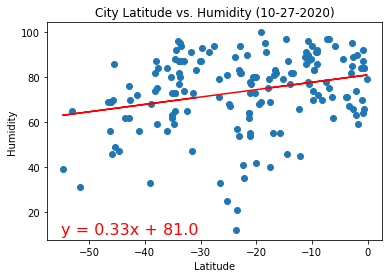

Linear Regression = slightly negative Correlation
No real correlation relationship can be inferred from this dataset


In [21]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 8 - LinearREG-Lat_V_Humid - South.png'

#line equation position
linepos = (-55,10)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly negative Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.06031532555286316


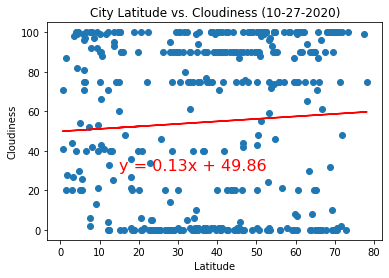

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [22]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 9 - LinearREG-Lat_V_Cloud - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.11272151260279882


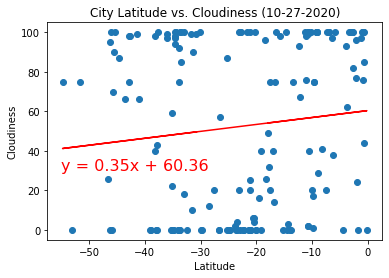

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [23]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 10 - LinearREG-Lat_V_Cloud - South.png'

#line equation position
linepos = (-55,30)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: 0.11777769931603001


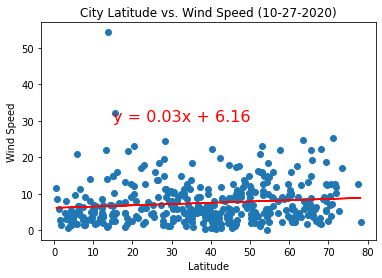

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [24]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 11 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: -0.23042327885728942


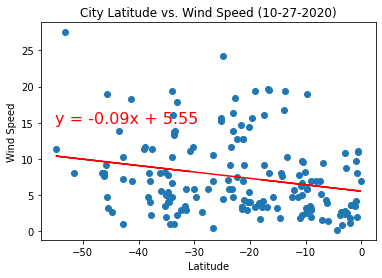

Linear Regression = slightly negative Correlation
No real correlation relationship can be inferred from this dataset


In [25]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 12 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (-55,15)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly negative Correlation')
print('No real correlation relationship can be inferred from this dataset')

#### Oservations:

1. As you move away from the equator (Lat:0), temperature drops

2. Wind Speeds increase slightly as you move away from the equator

3. Almost little to no correlation between Latitude and Humidity/Cloudiness